In [1]:
# One place manifold learning is often is used in understanding the relationship
# between high-dimensional data points
# A common case of high dimensional data is images
# A set of images with 1000 pixels can be thought of as collection
# of points in 1000 dimensions
# the brightness of each pixel in each image defines the coordinates in that dimension

In [2]:
# Let's apply Isomap on some faces data

In [6]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=30)
faces.data.shape

(2208, 2914)

In [5]:
# Let's quickly visualize several images to see what we're working with

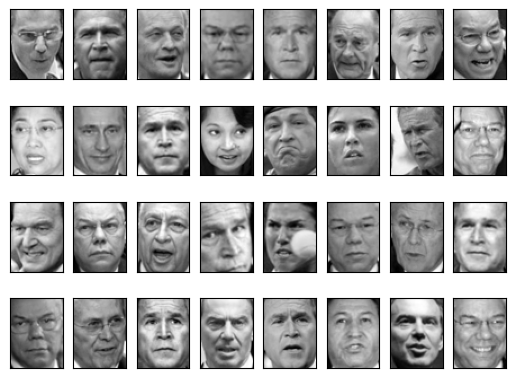

In [7]:
fig, ax = plt.subplots(4, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gray')

In [8]:
# Compute PCA and examine the explained variance ratio
# which will give us idea of how many features are required 
# to describe the data

In [12]:
import numpy as np

In [11]:
from sklearn.decomposition import PCA
model = PCA(n_components=100, svd_solver='randomized').fit(faces.data)

Text(0, 0.5, 'cumulative variance')

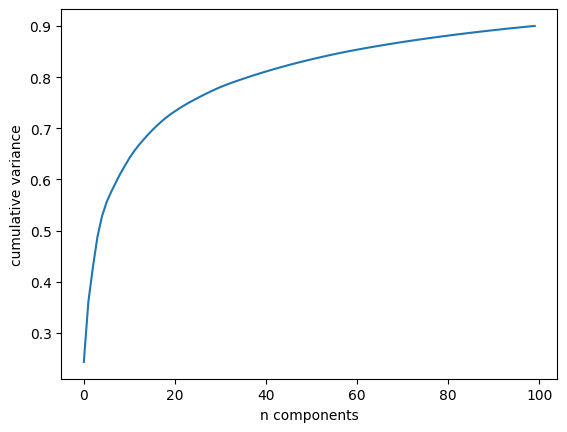

In [13]:
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel('n components')
plt.ylabel('cumulative variance')

In [16]:
# We see for this data nearly 100 components are required 90% of the variance
# This tells us that data is intrisically very high dimensional
# it cant be described linearly with just few components

In [17]:
# When this is the case, nonlinear manifold embeddings like LLE and Isomap can be helpful
# we can compute an Isomap embedding on these faces using the same pattern shown before

In [18]:
from sklearn.manifold import Isomap
model = Isomap(n_components=2)
proj = model.fit_transform(faces.data)
proj.shape

(2208, 2)

In [19]:
# The output is a 2D projection of all the input images

In [21]:
# To get a better idea of what the projection tells us, let's define a function that will
# output image thumbnails as the locations of the projections

In [22]:
from matplotlib import offsetbox


In [26]:
def plot_components(data, model, images=None, ax=None, thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()

    proj=model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')

    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            show_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(images[i], cmap=cmap), proj[i])
            ax.add_artist(imagebox)

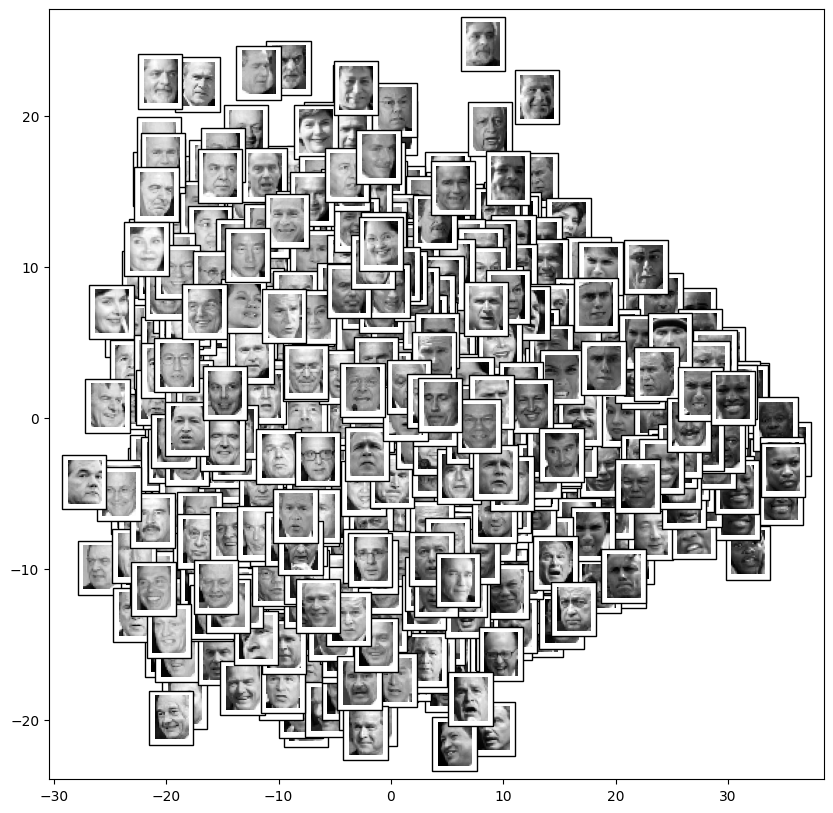

In [27]:
# calling this function now we see the result
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(faces.data, model=Isomap(n_components=2), images=faces.images[:, ::2, ::2])

In [28]:
# Isomap embedding of the faces data

In [29]:
# the first two isomap dimensions seem to describe global image features
# the overall darkness or lightness of the image from left to right
# and general orientation of the face from bottom to top
# This gives us a nice visual indication of some of the fundamental features in our data